In [1]:
import os
import shutil

In [2]:
import os, shutil

original_dataset_dir = '../../../newvolume/cat-dog-data/train'

base_dir = '../../../newvolume/cat-dog-data/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')



train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

def move_imgs(base_fname, start, end, dst_dir):
    fnames = [base_fname+'.{}.jpg'.format(i) for i in range(start, end)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(dst_dir, fname)
        shutil.copyfile(src, dst)

In [5]:
os.mkdir(base_dir)

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

move_imgs('cat', 0, 1000, train_cats_dir)
move_imgs('cat', 1000, 1500, validation_cats_dir)
move_imgs('cat', 1500, 2000, test_cats_dir)
move_imgs('dog', 0, 1000, train_dogs_dir)
move_imgs('dog', 1000, 1500, validation_dogs_dir)
move_imgs('dog', 1500, 2000, test_dogs_dir)

In [3]:
assert 1000 == len(os.listdir(train_cats_dir))
assert 1000 == len(os.listdir(train_dogs_dir))
assert 500 ==  len(os.listdir(validation_cats_dir))
assert 500 ==  len(os.listdir(validation_dogs_dir))
assert 500 ==  len(os.listdir(test_cats_dir))
assert 500 ==  len(os.listdir(test_dogs_dir))

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
data_batch, labels_batch = next(train_generator)
print(data_batch.shape, labels_batch.shape)

(20, 150, 150, 3) (20,)


In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 10s 98ms/step - loss: 0.6888 - acc: 0.5345 - val_loss: 0.6740 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6587 - acc: 0.6165 - val_loss: 0.6451 - val_acc: 0.6130
Epoch 3/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6154 - acc: 0.6640 - val_loss: 0.6452 - val_acc: 0.6060
Epoch 4/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5743 - acc: 0.7025 - val_loss: 0.5998 - val_acc: 0.6640
Epoch 5/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5365 - acc: 0.7240 - val_loss: 0.5828 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5093 - acc: 0.7485 - val_loss: 0.5635 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 8s 76ms/step - loss: 0.4746 - acc: 0.7705 - val_loss: 0.5565 - val_acc: 0.7190
Epoch 8/30
100/100 [==============================] - 8s 76ms/step -

In [22]:
model.save('cats_and_dogs_small_1.h5')

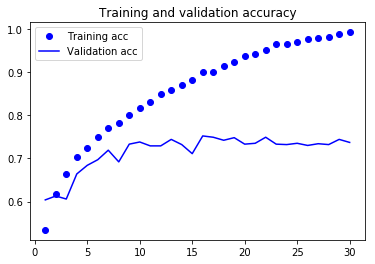

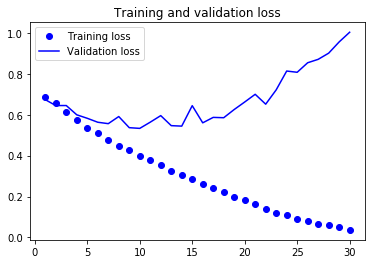

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- Plots show a clear overfitting
    * Validation accuracy stalls
    * Validation loss rapidly reaches its minimum

## Data augmentation

- Technique that augments available data by applying random transformations that creates "new" convincing images
- Effective since your model will never be exposed to two identical inputs
- But limited, because the "new" inputs it sees are only a remix of the original data

In [9]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

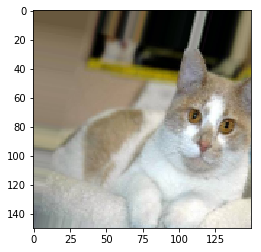

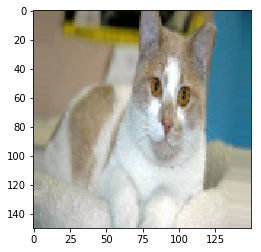

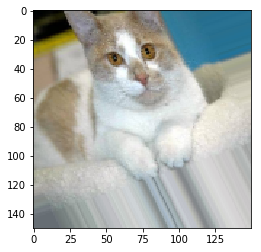

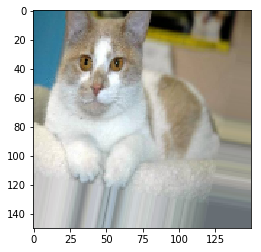

In [13]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6946 - acc: 0.5088 - val_loss: 0.6848 - val_acc: 0.5812
Epoch 2/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6834 - acc: 0.5541 - val_loss: 0.6776 - val_acc: 0.5354
Epoch 3/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6697 - acc: 0.5866 - val_loss: 0.6428 - val_acc: 0.6047
Epoch 4/100
100/100 [==============================] - 25s 251ms/step - loss: 0.6591 - acc: 0.6050 - val_loss: 0.6269 - val_acc: 0.6437
Epoch 5/100
100/100 [==============================] - 26s 258ms/step - loss: 0.6388 - acc: 0.6250 - val_loss: 0.5871 - val_acc: 0.6796
Epoch 6/100
100/100 [==============================] - 25s 254ms/step - loss: 0.6248 - acc: 0.6497 - val_loss: 0.5905 - val_acc: 0.6707
Epoch 7/100
100/100 [==============================] - 25s 254ms/step - loss: 0.6133 - acc: 0.6613 -

100/100 [==============================] - 25s 250ms/step - loss: 0.4135 - acc: 0.8066 - val_loss: 0.4129 - val_acc: 0.8154
Epoch 61/100
100/100 [==============================] - 25s 255ms/step - loss: 0.4187 - acc: 0.8034 - val_loss: 0.4356 - val_acc: 0.8003
Epoch 62/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4149 - acc: 0.8066 - val_loss: 0.4089 - val_acc: 0.8166
Epoch 63/100
100/100 [==============================] - 25s 253ms/step - loss: 0.4079 - acc: 0.8122 - val_loss: 0.4230 - val_acc: 0.8080
Epoch 64/100
100/100 [==============================] - 25s 251ms/step - loss: 0.3920 - acc: 0.8228 - val_loss: 0.5153 - val_acc: 0.7745
Epoch 65/100
100/100 [==============================] - 25s 251ms/step - loss: 0.4091 - acc: 0.8084 - val_loss: 0.4238 - val_acc: 0.8096
Epoch 66/100
100/100 [==============================] - 27s 266ms/step - loss: 0.4056 - acc: 0.8181 - val_loss: 0.4289 - val_acc: 0.8138
Epoch 67/100
100/100 [==============================] 

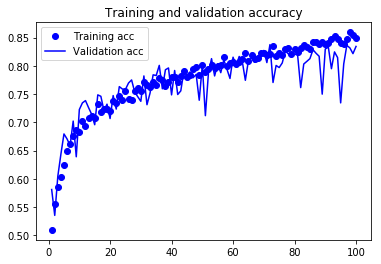

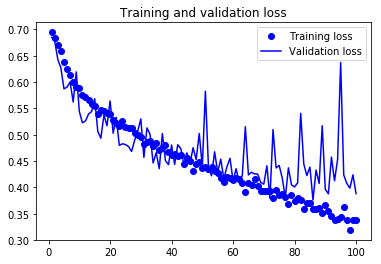

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()